In [2]:
ls

Untitled.ipynb  dds.csv*


In [3]:
from __future__ import division
import pandas as pd

In [4]:
df = pd.read_csv('dds.csv')

In [15]:
dfh = df.head()

In [21]:
df.time = pd.to_datetime(df.time, unit='ms')

In [7]:
# Main functions
if 'df' not in locals(): 
    df = pd.DataFrame() # Necessary for the inicialization of get_house_data

# Get measurements for a given house_id
def get_house_data(df, house_id, start=0, ending=len(df), features=df.columns, sampl_rate=1):
    '''Returns a dataframe for a given house_id'''
    house_data = df[df['dataid']==house_id][features][start:ending:sampl_rate]
    return house_data

# Plot house daily profile
def house_plot(df, house_id, day_start, day_end, feature='use'):    
    plt.figure(figsize=(16,10))
    house_data = get_house_data(df, house_id, features=feature)
    plt.plot(house_data[1440*day_start:1440*day_end])
    plt.show()

def heatmap_plot(df, house_id, s_rate=1):
    house_data = get_house_data(df, house_id, start=0, ending=-1, features='use', sampl_rate=s_rate)
    matrix = house_data.values.reshape(367, 1440/s_rate)
    fig = plt.figure(figsize=(16,100))
    ax = plt.axes()
    sns.heatmap(matrix, cbar=False, cmap='plasma', ax=ax)
    ax.set_title("House ID: {}".format(house_id), fontdict={'fontsize': 16})

In [31]:
print('Timeframe starts in {} and finishes in {}'.format(df.time[0], df.time[len(df)-1]))

Timeframe starts in 2016-10-13 13:59:38.504000 and finishes in 2017-03-21 20:11:22.097000


Let's cut out incomplete dates and start the series from 14-10-2016 to 20-03-2017

In [71]:
df = df[df.time >= pd.Timestamp('2016-10-14')]

In [74]:
df = df[df.time < pd.Timestamp('2017-03-21')]

In [75]:
df.head()

,time,serverTime,energy,energyOut,power1,power2,power3,power
17998,2016-10-14 00:00:01.646,1476403201815,147706197441000,0,96250,171920,133010,401180
17999,2016-10-14 00:00:03.645,1476403203751,147706199671000,0,96340,171850,133060,401250
18000,2016-10-14 00:00:05.645,1476403205751,147706201899000,0,96180,171740,133060,400980
18001,2016-10-14 00:00:07.645,1476403207751,147706204127000,0,96320,171950,132960,401230
18002,2016-10-14 00:00:09.645,1476403209751,147706206358000,0,96400,172000,133170,401570


In [76]:
df.tail()

,time,serverTime,energy,energyOut,power1,power2,power3,power
6843972,2017-03-20 23:59:51.264,1490054391277,180453599366000,0,133080,101130,108400,342610
6843973,2017-03-20 23:59:53.264,1490054393277,180453601276000,0,133020,102670,108360,344050
6843974,2017-03-20 23:59:55.264,1490054395341,180453603182000,0,133110,101450,108260,342820
6843975,2017-03-20 23:59:57.264,1490054397277,180453605088000,0,133070,101790,108310,343170
6843976,2017-03-20 23:59:59.263,1490054399277,180453606987000,0,131680,101340,108400,341420


In [85]:
len(df[df.time >= pd.Timestamp('2016-10-14')][df.time < pd.Timestamp('2016-10-15')])

43203

In [90]:
for n in range(14,29):
    print len(df[df.time >= pd.Timestamp('2016-10-{}'.format(n))][df.time < pd.Timestamp('2016-10-{}'.format(n+1))])

43203


/Users/wittmann/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


43203
43200
43203
43203
43197
43203
43203
43200
43203
43203
43204
43203
43203
43203


In [91]:
print df.resample.__doc__


        Convenience method for frequency conversion and resampling of time
        series.  Object must have a datetime-like index (DatetimeIndex,
        PeriodIndex, or TimedeltaIndex), or pass datetime-like values
        to the on or level keyword.

        Parameters
        ----------
        rule : string
            the offset string or object representing target conversion
        axis : int, optional, default 0
        closed : {'right', 'left'}
            Which side of bin interval is closed
        label : {'right', 'left'}
            Which bin edge label to label bucket with
        convention : {'start', 'end', 's', 'e'}
        loffset : timedelta
            Adjust the resampled time labels
        base : int, default 0
            For frequencies that evenly subdivide 1 day, the "origin" of the
            aggregated intervals. For example, for '5min' frequency, base could
            range from 0 through 4. Defaults to 0
        on : string, optional
            Fo

In [96]:
df.time.resample('30S')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [98]:
df2 = df

In [99]:
df2.index = df2.time

In [103]:
series = df2.power

In [113]:
len(series.resample('15min').mean())

15168

In [116]:
matrix = series.resample('15min').mean()

In [130]:
m = matrix.values.reshape(len(matrix)//96, 24*60//15)

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

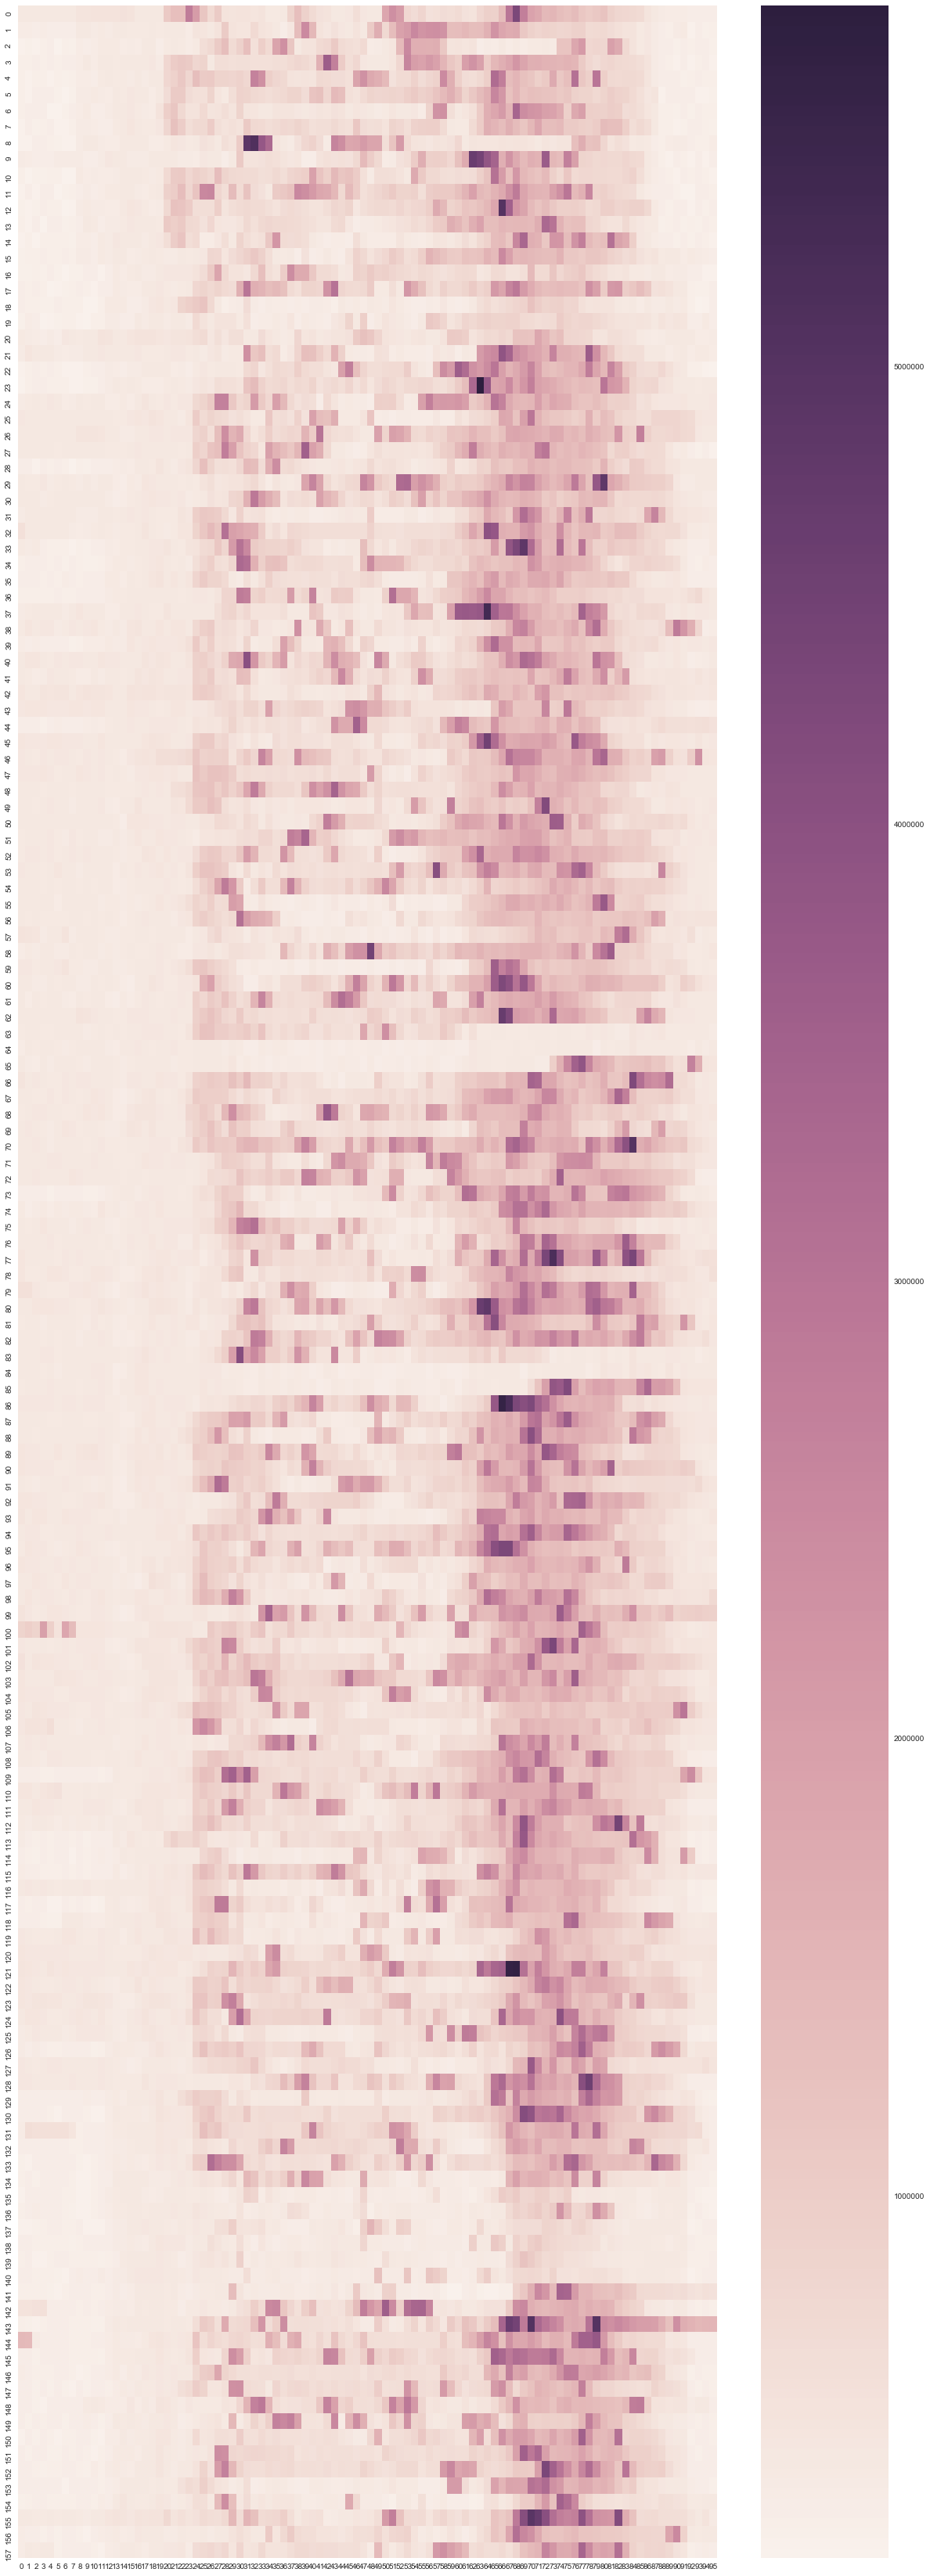

In [132]:
plt.figure(figsize=(20,60))
sns.heatmap(m)

In [133]:
def resample(df, sampl_rate='15min', feature='power'):
    '''Takes the feature of a dataframe as a series and resample it to sampl_rate minutes'''
    return df[feature].resample(sampl_rate).mean()

In [136]:
def heatmap_plot(df, feature='power'):
    resample(df, feature=feature)